# Augmentation

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, target_transforms, augmentations, utils

%matplotlib notebook
import matplotlib.pyplot as plt
from ssd.core.inference import toVisualizeRectangleimg

# Geometric distortions

## Random Expand

[[164.  73. 523. 353.]]
(164.0, 73.0) (523.0, 353.0)


<IPython.core.display.Javascript object>


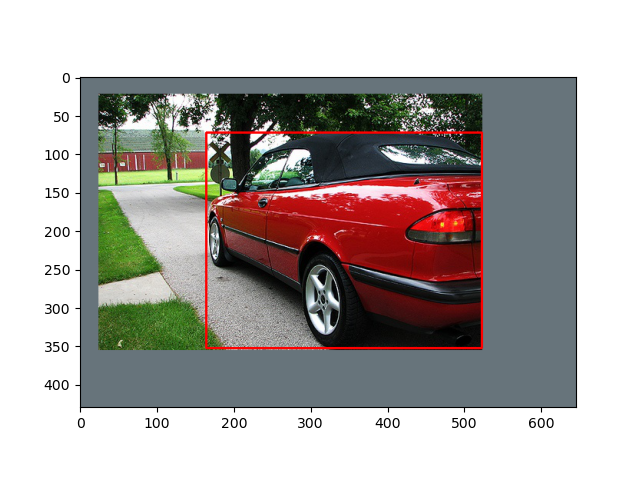

[[130. 540. 246. 706.]]
(130.0, 540.0) (246.0, 706.0)


<IPython.core.display.Javascript object>


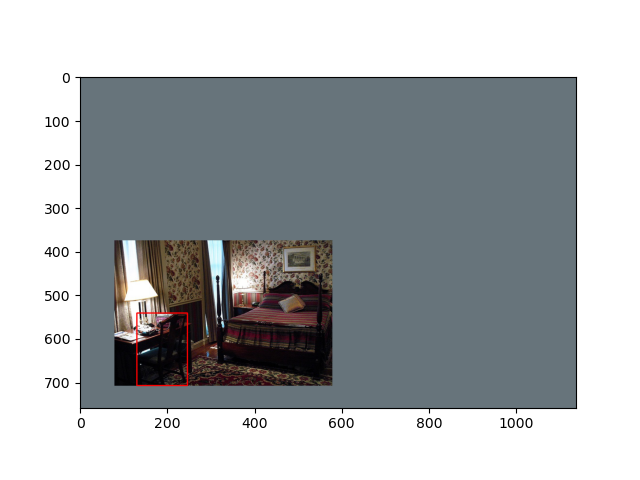

[[ 92. 479. 252. 621.]]
(92.0, 479.0) (252.0, 621.0)


<IPython.core.display.Javascript object>


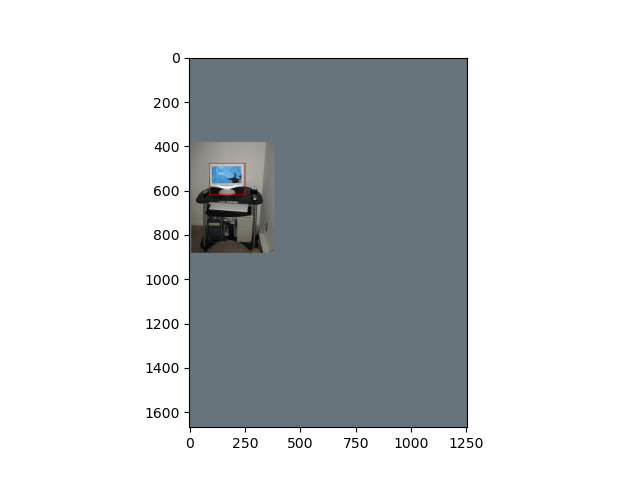

[[172. 282. 658. 466.]]
(172.0, 282.0) (658.0, 466.0)


<IPython.core.display.Javascript object>


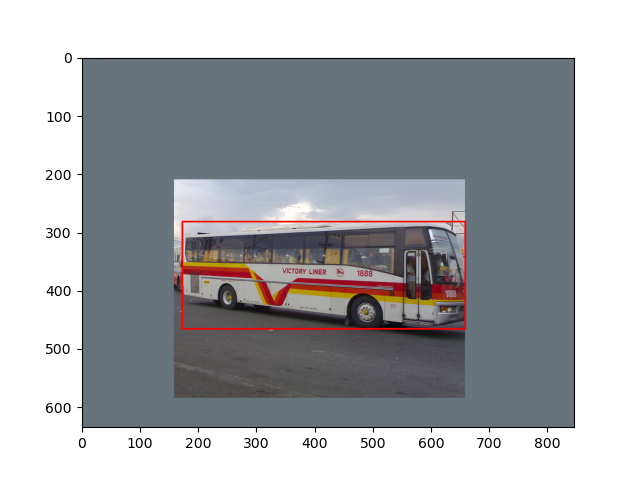

In [2]:
augmentation = augmentations.RandomExpand(filled_rgb_mean=(103.939, 116.779, 123.68), rmin=1, rmax=4, p=1)

transform = transforms.Compose(
    [transforms.ToTensor()]
)

target_transform = target_transforms.Compose(
    [target_transforms.Ignore(difficult=True),
     target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums),
     target_transforms.ToTensor()]
)

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Sample

[[ 86.  32. 444. 312.]]
(86.0, 32.0) (444.0, 312.0)


<IPython.core.display.Javascript object>


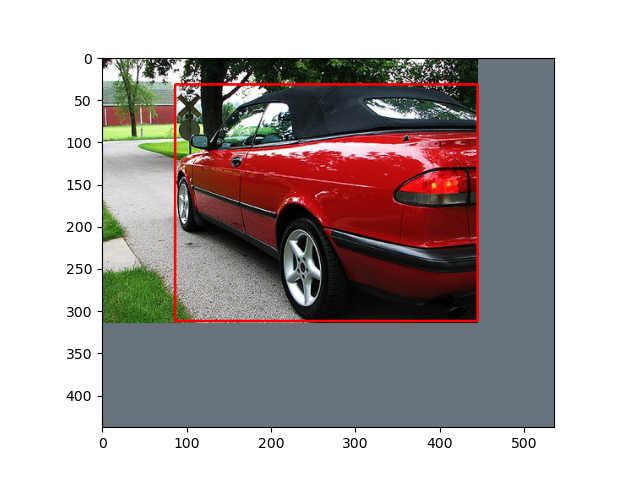

[[ 37.  52. 153. 217.]]
(37.0, 52.0) (153.0, 217.0)


<IPython.core.display.Javascript object>


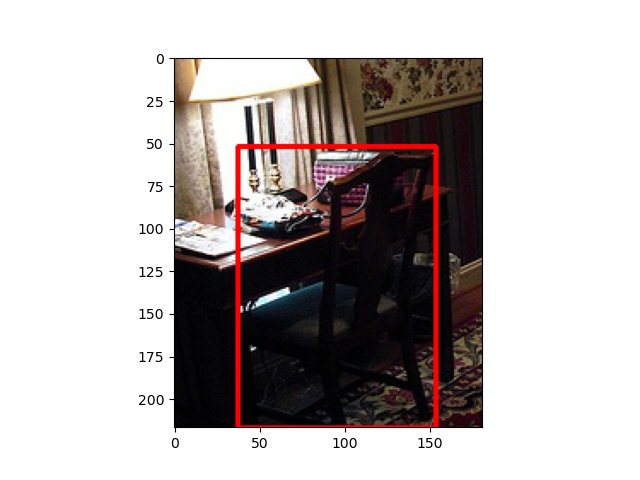

[[198. 425. 359. 562.]]
(198.0, 425.0) (359.0, 562.0)


<IPython.core.display.Javascript object>


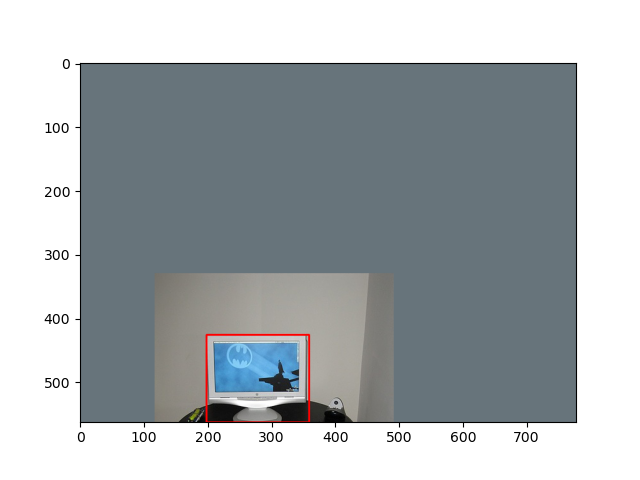

[[  0.  80. 295. 264.]]
(0.0, 80.0) (295.0, 264.0)


<IPython.core.display.Javascript object>


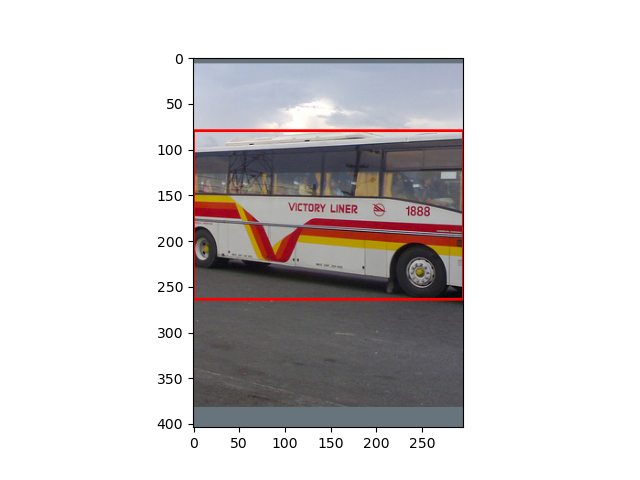

In [3]:
augmentation = augmentations.Compose([
    augmentations.RandomExpand(),
    augmentations.RandomSampled()
])

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Flip

[[  0.  50. 359. 330.]]
(0.0, 50.0) (359.0, 330.0)


<IPython.core.display.Javascript object>


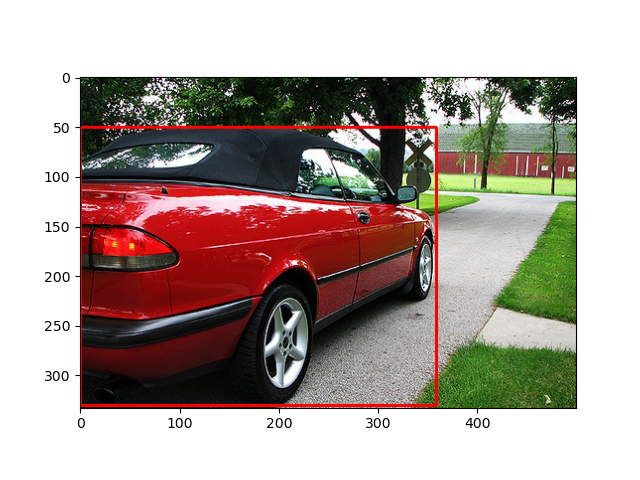

[[333. 166. 448. 332.]]
(333.0, 166.0) (448.0, 332.0)


<IPython.core.display.Javascript object>


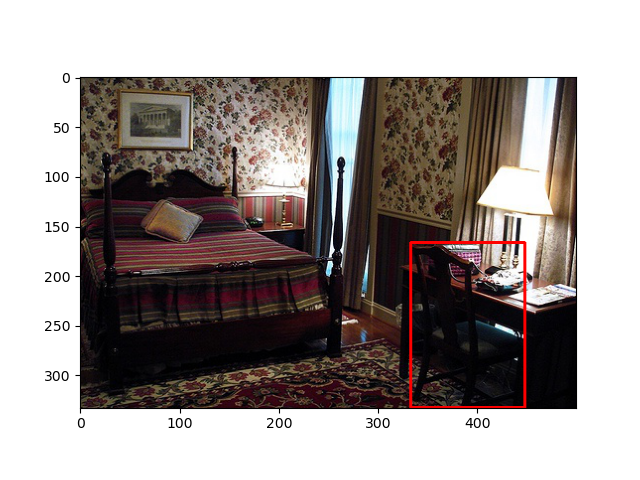

[[132.  95. 293. 238.]]
(132.0, 95.0) (293.0, 238.0)


<IPython.core.display.Javascript object>


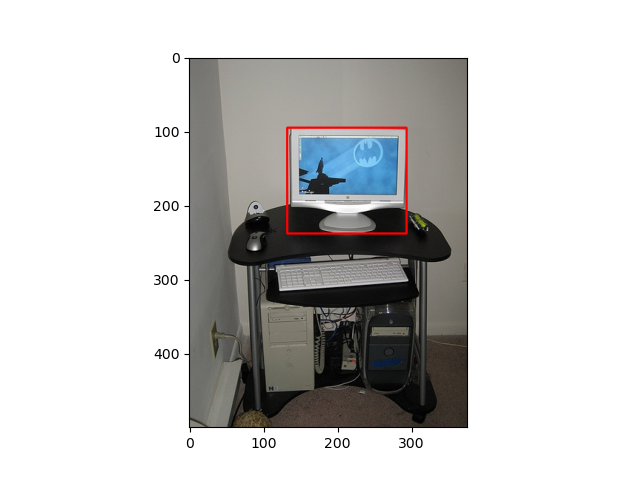

[[  0.  73. 486. 257.]]
(0.0, 73.0) (486.0, 257.0)


<IPython.core.display.Javascript object>


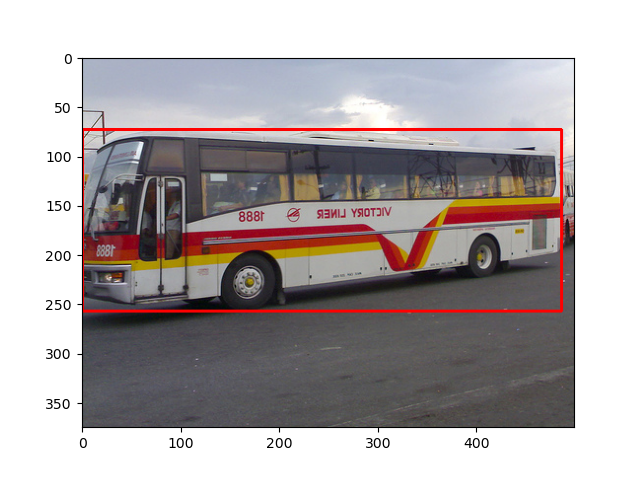

In [4]:
augmentation = augmentations.RandomFlip(p=1)

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)